In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

ignore the warning

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv('../data/HousePrice.csv')
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [101]:
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)
print("Categorical variables:",len(obj_cols))

Categorical variables: 4


<Axes: >

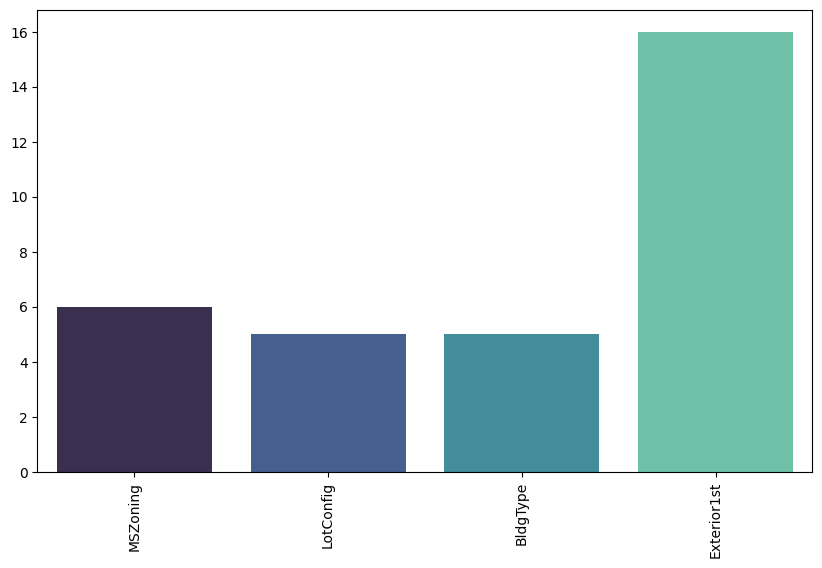

In [102]:
unique_values = []
for col in obj_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x=obj_cols, y=unique_values,hue=obj_cols,palette='mako')


In [103]:
df.drop(['Id'],axis=1)
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())
new_df = df.dropna()

In [104]:
s = (new_df.dtypes== 'object')
obj_cols = list(s[s].index)

In [105]:
lable_enc = {}


for col in obj_cols:
    lable_enc[col] = LabelEncoder()
    new_df[col] = lable_enc[col].fit_transform(new_df[col])


In [106]:
x = new_df.drop(['SalePrice'],axis=1)
y = new_df['SalePrice']

In [107]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(xtrain, ytrain)

predictions = model.predict(xtest)

print("R2 Score:",r2_score(ytest,predictions))

R2 Score: 0.8049737151439552
